# Clustering iris dataset according to petal length and petal width

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

In [50]:
iris = load_iris()

In [51]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [52]:
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [53]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
df['plant_name'] = iris.target_names[iris.target]

In [55]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),plant_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
df['target'] = iris.target

In [57]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),plant_name,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


# Visualise data using Scatter plot between petal length and petal width

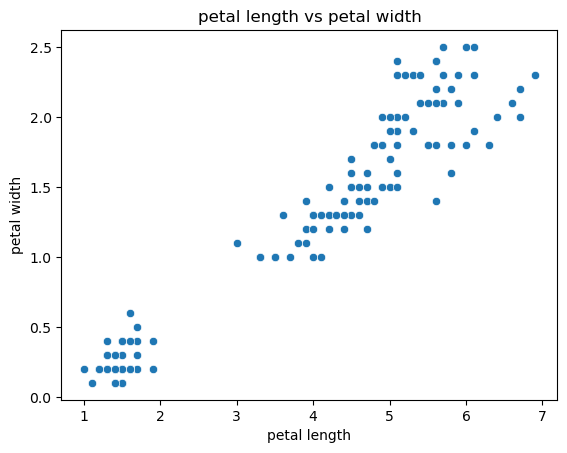

<Figure size 1600x400 with 0 Axes>

In [58]:
sns.scatterplot(x = df['petal length (cm)'],y = df['petal width (cm)'])
plt.title('petal length vs petal width')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.figure(figsize=(16,4))
plt.show()

# Finding number of cluster is suitable for the above data using Elbow graph

In [59]:
# k_rang = range(1,11)
# s = []
# for k in k_rang:
#     km = KMeans(n_clusters=k,n_init=20)
#     km.fit(df[['petal length (cm)','petal width (cm)']])
#     s.append(km.inertia_)
# print(s)
k_rag = range(1,11)
inertia = []
for k in k_rag:
    km = KMeans(n_clusters=k,n_init=20)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    inertia.append(km.inertia_)
print(inertia)

C:\Users\Satheesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Satheesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Satheesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Satheesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory le

[550.8953333333334, 86.39021984551397, 31.37135897435897, 19.48300089968511, 13.916908757908757, 11.036333877751728, 9.19741795859874, 7.615402244955952, 6.456494541406306, 5.551913395641018]


# plotting line graph

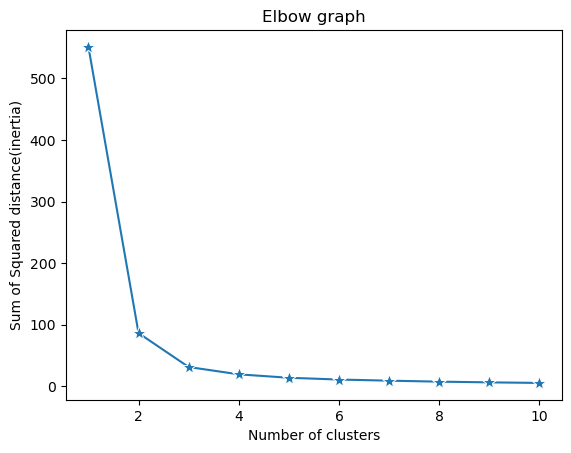

<Figure size 1600x400 with 0 Axes>

In [60]:
sns.lineplot(x = k_rang,y=inertia,marker='*',markersize=10)
plt.title('Elbow graph')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared distance(inertia)')
plt.figure(figsize=(16,4))
plt.show()

# From the above graph we can compute that k = 3

In [61]:
km = KMeans(n_clusters=3,n_init=20)

In [62]:
predicted_values = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
predicted_values

C:\Users\Satheesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [63]:
df['Predicted_values'] = predicted_values

In [64]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),plant_name,target,Predicted_values
0,5.1,3.5,1.4,0.2,setosa,0,2
1,4.9,3.0,1.4,0.2,setosa,0,2
2,4.7,3.2,1.3,0.2,setosa,0,2
3,4.6,3.1,1.5,0.2,setosa,0,2
4,5.0,3.6,1.4,0.2,setosa,0,2


In [65]:
centers = km.cluster_centers_
print(centers)

[[4.26923077 1.34230769]
 [5.59583333 2.0375    ]
 [1.462      0.246     ]]


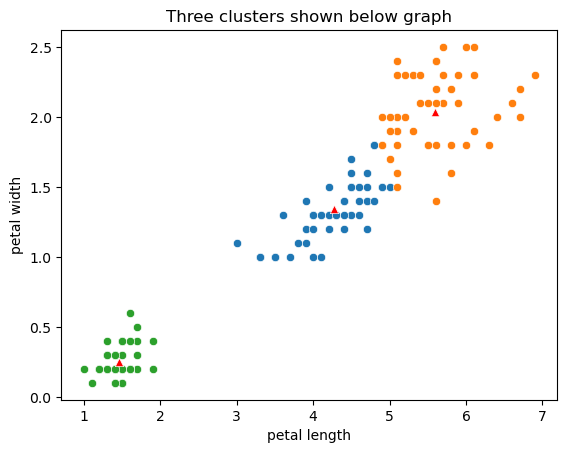

<Figure size 1600x400 with 0 Axes>

In [66]:
x = df[df['Predicted_values']==0]
y = df[df['Predicted_values']==1]
z = df[df['Predicted_values']==2]
sns.scatterplot(x = x['petal length (cm)'],y = x['petal width (cm)'])
sns.scatterplot(x = y['petal length (cm)'],y = y['petal width (cm)'])
sns.scatterplot(x = z['petal length (cm)'],y = z['petal width (cm)'])
sns.scatterplot(x=centers[:,0],y = centers[:,1],marker='^',color='red')
plt.title('Three clusters shown below graph')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.figure(figsize=(16,4))
plt.show()

# This model makes clusters only but does not tells name of the group

# Below graph shows actual clusters

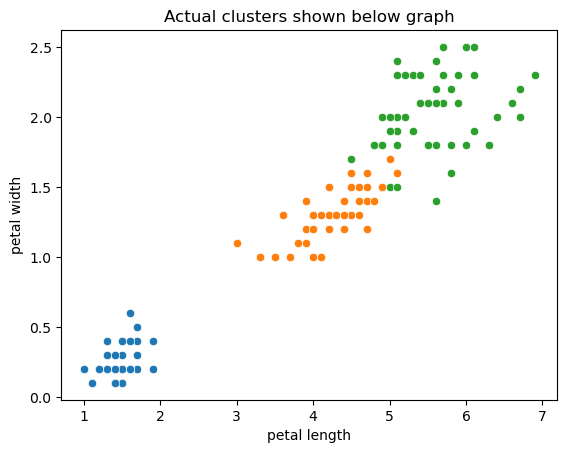

<Figure size 1600x400 with 0 Axes>

In [67]:
setosa = df[df['target']==0]
versicolor = df[df['target']==1]
virginica = df[df['target']==2]
sns.scatterplot(x = setosa['petal length (cm)'],y = setosa['petal width (cm)'])
sns.scatterplot(x = versicolor['petal length (cm)'],y = versicolor['petal width (cm)'])
sns.scatterplot(x = virginica['petal length (cm)'],y = virginica['petal width (cm)'])
plt.title('Actual clusters shown below graph')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.figure(figsize=(16,4))
plt.show()

# we can calculate performance of this model by calculating silhouette score

In [68]:
performance = silhouette_score(df[['petal length (cm)','petal width (cm)']],predicted_values)
print(performance)

0.6604800084226021
